In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt         
import geopandas                           
from shapely.geometry import Point    
import seaborn as sns      
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
import matplotlib.ticker as mticker

In [2]:
# Download data from:
# https://www2.census.gov/programs-surveys/demo/tables/health-insurance/time-series/acs/hic04_acs.xlsx
file_path = 'hic04_acs.xlsx'
xls = pd.ExcelFile(file_path)
xls.sheet_names

['hic04_acs']

In [3]:
df = pd.read_excel(file_path, sheet_name='hic04_acs')
df.head()

,Table with row headers in columns A and B and column headers in rows 4 through 5,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,Table HIC-4_ACS. Health Insurance Coverage Sta...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Note: Numbers in thousands. Civilian noninstit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nation/State,Coverage,2023,NaN,NaN,NaN,2022,NaN,NaN,NaN,...,NaN,NaN,2009,NaN,NaN,NaN,2008,NaN,NaN,NaN
3,NaN,NaN,Estimate,Margin of error 1,Percent,Margin of error 1,Estimate,Margin of error 1,Percent,Margin of error 1,...,Percent,Margin of error 1,Estimate,Margin of error 1,Percent,Margin of error 1,Estimate,Margin of error 1,Percent,Margin of error 1
4,United States,Total,330000,20,100,0,328300,17,100,0,...,100,0,301500,23,100,0,298600,20,100,0


In [4]:
df_clean = pd.read_excel(file_path, sheet_name='hic04_acs', header=2)
df_clean

,Note: Numbers in thousands. Civilian noninstitutionalized population. Margins of error calculated using replicate weights.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,Nation/State,Coverage,2023,NaN,NaN,NaN,2022,NaN,NaN,NaN,...,NaN,NaN,2009,NaN,NaN,NaN,2008,NaN,NaN,NaN
1,NaN,NaN,Estimate,Margin of error 1,Percent,Margin of error 1,Estimate,Margin of error 1,Percent,Margin of error 1,...,Percent,Margin of error 1,Estimate,Margin of error 1,Percent,Margin of error 1,Estimate,Margin of error 1,Percent,Margin of error 1
2,United States,Total,330000,20,100,0,328300,17,100,0,...,100,0,301500,23,100,0,298600,20,100,0
3,United States,Any coverage,303800,180,92.1,0.1,301900,177,92,0.1,...,84.5,0.1,255800,235,84.9,0.1,255100,230,85.4,0.1
4,United States,Uninsured,26170,183,7.9,0.1,26370,179,8,0.1,...,15.5,0.1,45670,238,15.1,0.1,43500,233,14.6,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,Note: The estimates by type of coverage are no...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577,1 A margin of error (MOE) is a measure of an e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
578,2 As a result of disruptions to data collectio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579,"Source: U.S. Census Bureau, 2008 to 2023 Ameri...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_cleaned = pd.read_excel(file_path, sheet_name='hic04_acs', header=3)
df_cleaned.head()

,Nation/State,Coverage,2023,Unnamed: 3,Unnamed: 4,Unnamed: 5,2022,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 56,Unnamed: 57,2009,Unnamed: 59,Unnamed: 60,Unnamed: 61,2008,Unnamed: 63,Unnamed: 64,Unnamed: 65
0,NaN,NaN,Estimate,Margin of error 1,Percent,Margin of error 1,Estimate,Margin of error 1,Percent,Margin of error 1,...,Percent,Margin of error 1,Estimate,Margin of error 1,Percent,Margin of error 1,Estimate,Margin of error 1,Percent,Margin of error 1
1,United States,Total,330000,20,100,0,328300,17,100,0,...,100,0,301500,23,100,0,298600,20,100,0
2,United States,Any coverage,303800,180,92.1,0.1,301900,177,92,0.1,...,84.5,0.1,255800,235,84.9,0.1,255100,230,85.4,0.1
3,United States,Uninsured,26170,183,7.9,0.1,26370,179,8,0.1,...,15.5,0.1,45670,238,15.1,0.1,43500,233,14.6,0.1
4,United States,Private,221100,455,67,0.1,220700,456,67.2,0.1,...,65.8,0.1,203300,379,67.4,0.1,207800,353,69.6,0.1


In [6]:
df_long = df_cleaned.melt(
    id_vars=["Nation/State", "Coverage"],
    var_name="Year_or_Metric",
    value_name="Value"
)

df_long["Year_or_Metric"] = df_long["Year_or_Metric"].astype(str)
df_years_only = df_long[df_long["Year_or_Metric"].str.match(r"^\d{4}$")]
df_years_only = df_years_only.rename(columns={"Year_or_Metric": "Year"})

df_years_only

,Nation/State,Coverage,Year,Value
0,NaN,NaN,2023,Estimate
1,United States,Total,2023,330000
2,United States,Any coverage,2023,303800
3,United States,Uninsured,2023,26170
4,United States,Private,2023,221100
...,...,...,...,...
35375,Note: The estimates by type of coverage are no...,NaN,2008,NaN
35376,1 A margin of error (MOE) is a measure of an e...,NaN,2008,NaN
35377,2 As a result of disruptions to data collectio...,NaN,2008,NaN
35378,"Source: U.S. Census Bureau, 2008 to 2023 Ameri...",NaN,2008,NaN


In [7]:
df_years_only_cleaned = df_years_only.dropna()
df_years_only_cleaned.head()

,Nation/State,Coverage,Year,Value
1,United States,Total,2023,330000
2,United States,Any coverage,2023,303800
3,United States,Uninsured,2023,26170
4,United States,Private,2023,221100
5,United States,..Employer-based,2023,180400


In [8]:
uninsured_values = df_years_only_cleaned[df_years_only_cleaned["Coverage"] == "Uninsured"]
uninsured_values.head()

,Nation/State,Coverage,Year,Value
3,United States,Uninsured,2023,26170
14,Alabama,Uninsured,2023,426
25,Alaska,Uninsured,2023,73
36,Arizona,Uninsured,2023,727
47,Arkansas,Uninsured,2023,269


In [9]:
insured_coverage_types = [
    'Total',
    'Any coverage',
    'Private',
    '..Employer-based',
    '..Direct-purchase',
    '..TRICARE',
    'Public',
    '..Medicaid',
    '..Medicare',
    '..VA Care'
]
uninsured_coverage_type = 'Uninsured'

df_filtered = df_years_only_cleaned[
    (df_years_only_cleaned['Year'].astype(int).between(2013, 2023)) &
    (df_years_only_cleaned['Coverage'].isin(insured_coverage_types + [uninsured_coverage_type]))
]
df_filtered['Year'] = df_filtered['Year'].astype(int)

insured_data = df_filtered[df_filtered['Coverage'].isin(insured_coverage_types)] \
    .groupby('Year')['Value'].sum()
uninsured_data = df_filtered[df_filtered['Coverage'] == uninsured_coverage_type] \
    .groupby('Year')['Value'].sum()

C:\Users\lundi\AppData\Local\Temp\ipykernel_41068\3231864544.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year'] = df_filtered['Year'].astype(int)


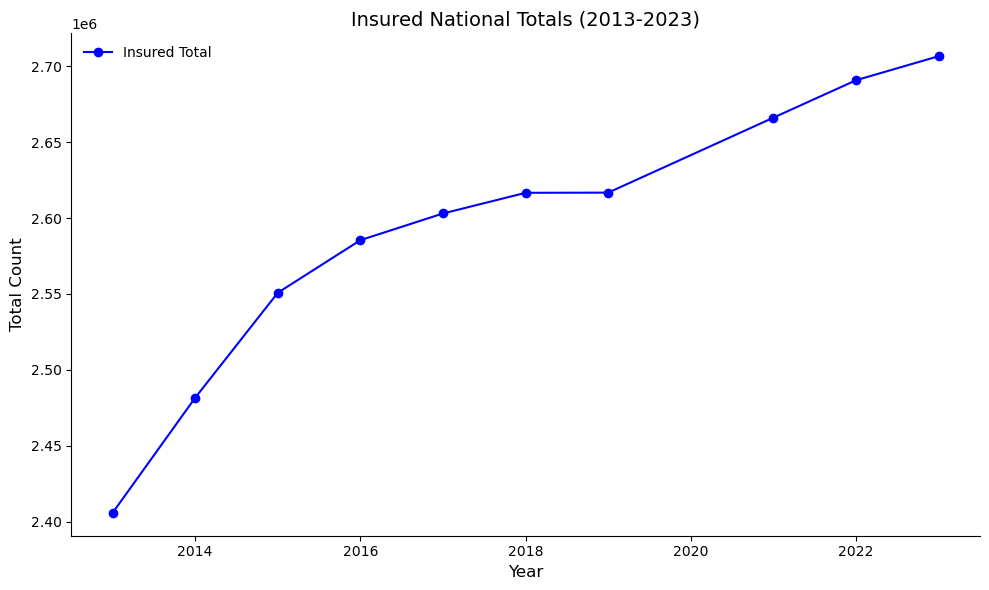

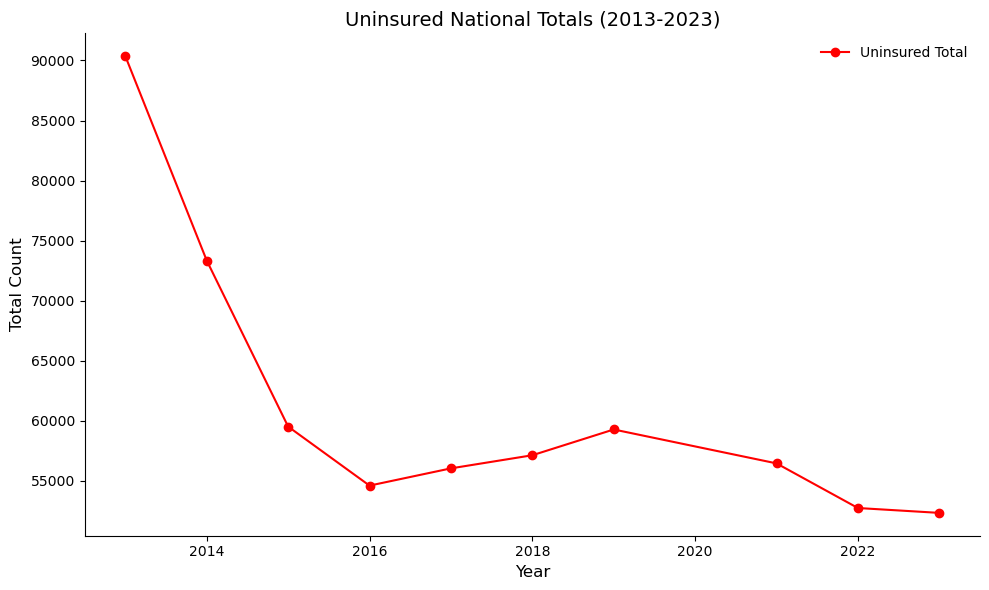

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(insured_data.index, insured_data.values, label="Insured Total", marker='o', color='blue')
plt.title("Insured National Totals (2013-2023)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Count", fontsize=12)
plt.legend(frameon=False)
plt.tight_layout()

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()



plt.figure(figsize=(10, 6))
plt.plot(uninsured_data.index, uninsured_data.values, label="Uninsured Total", marker='o', color='red')
plt.title("Uninsured National Totals (2013-2023)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Count", fontsize=12)
plt.legend(frameon=False)
plt.tight_layout()

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [11]:
# Healthcare Spending per Capita Across States and D.C. (2020) 
# download data from:
# https://www.kff.org/other/state-indicator/health-spending-per-capita/?currentTimeframe=0&selectedRows=%7B%22states%22:%7B%22wisconsin%22:%7B%7D%7D%7D&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D
state_data = pd.read_csv('raw_data.csv', skiprows=3)
columns = ['Location', 'Health Spending per Capita']
state_data.columns = columns
state_data['Health Spending per Capita'] = (
    state_data['Health Spending per Capita']
    .replace(r'[\$,]', '', regex=True)  # Remove dollar signs
    .astype(float)                    
)

print(state_data.head())

     Location  Health Spending per Capita
0     Alabama                      9280.0
1      Alaska                     13642.0
2     Arizona                      8756.0
3    Arkansas                      9338.0
4  California                     10299.0


In [12]:
state_data['Location'] = state_data['Location'].astype(str)
state_data.dropna(subset=['Health Spending per Capita'], inplace=True)

sorted_data = state_data.sort_values(by='Health Spending per Capita', ascending=True)

print(sorted_data.head())

    Location  Health Spending per Capita
44      Utah                      7522.0
12     Idaho                      8148.0
28    Nevada                      8348.0
43     Texas                      8406.0
5   Colorado                      8583.0


In [13]:
nationwide_average = state_data['Health Spending per Capita'].mean()
nationwide_average

10477.078431372549

In [14]:
# Clean the health spending data
state_data['Health Spending per Capita'] = (
    state_data['Health Spending per Capita']
    .replace(r'[\$,]', '', regex=True)  # Remove dollar signs
    .astype(float)
)

### Geo map for Health Spending

In [16]:
# Load shapefile
file_path = "cb_2018_us_state_5m/cb_2018_us_state_5m.shp"
# Create GeoDataFrame for 2013
geo_df = geopandas.read_file(file_path)
geo_df.head()


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2..."
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"POLYGON ((-109.05017 31.48, -109.04984 31.4995..."
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"POLYGON ((-104.0577 44.99743, -104.05021 44.99..."
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."


In [17]:
# Strip any leading/trailing spaces and convert both columns to uppercase
state_data['Location'] = state_data['Location'].str.strip().str.upper()  
geo_df['NAME'] = geo_df['NAME'].str.strip().str.upper()

geo_df = geo_df.merge(state_data, left_on='NAME', right_on='Location', how='left')

# Check if the 'Health Spending per Capita' column is now in geo_df
print(geo_df[['NAME', 'Health Spending per Capita']])


                                            NAME  Health Spending per Capita
0                                       NEBRASKA                     10514.0
1                                     WASHINGTON                      9265.0
2                                     NEW MEXICO                      8902.0
3                                   SOUTH DAKOTA                     12495.0
4                                          TEXAS                      8406.0
5                                     CALIFORNIA                     10299.0
6                                       KENTUCKY                     10257.0
7                                           OHIO                     10478.0
8                                        ALABAMA                      9280.0
9                                        GEORGIA                      8758.0
10                                     WISCONSIN                      9982.0
11                                        OREGON                     10071.0

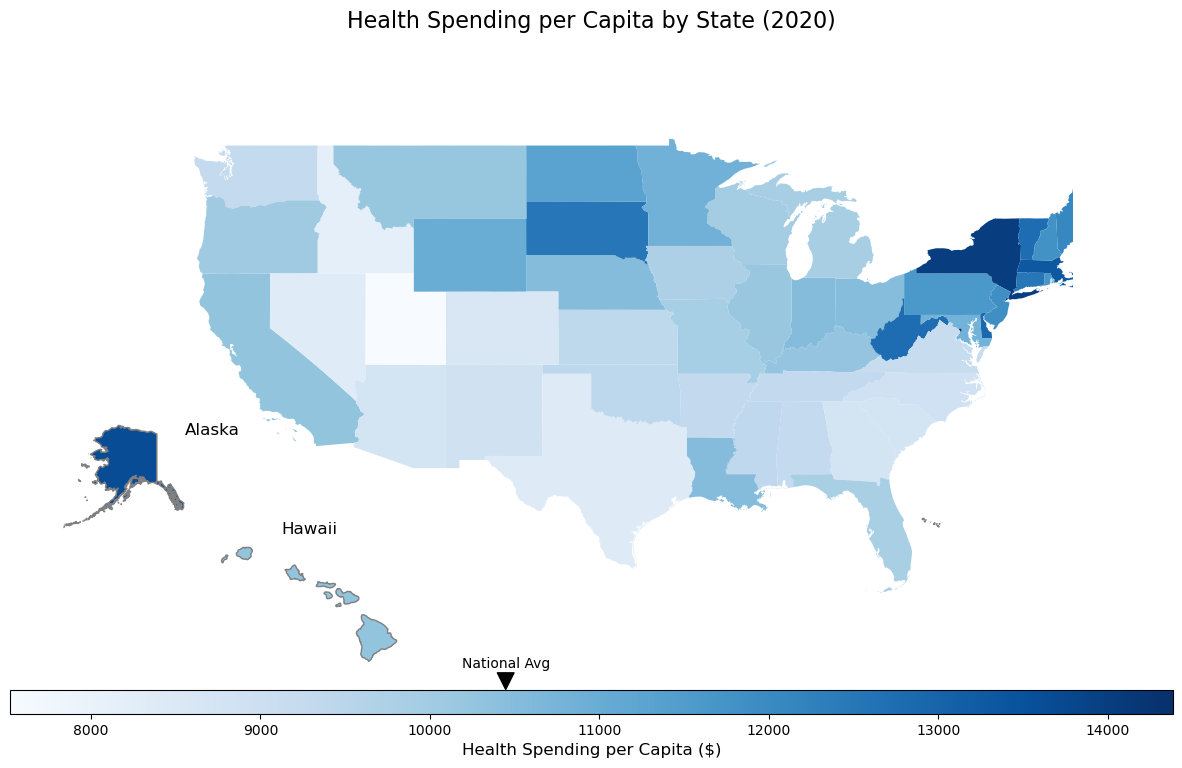

In [18]:
columns_to_plot = ['Health Spending per Capita']

fig, axes = plt.subplots(1, 1, figsize=(15, 10))  
axes = [axes]  

us_bounds = {'xlim': (-130, -70), 'ylim': (20, 55)}

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    norm = Normalize(vmin=geo_df[column].min(), vmax=geo_df[column].max())

    geo_df.plot(
        column=column,
        cmap='Blues',  
        ax=ax,
        legend=False,
        norm=norm,  
    )

    ax.set_xlim(us_bounds['xlim'])
    ax.set_ylim(us_bounds['ylim'])
    
    ax.set_title(f"{column} by State (2020)", fontsize=16)
    ax.axis('off')  

    alaska_ax = inset_axes(
        ax,
        width="100%", height="100%",  
        loc='lower left',
        bbox_to_anchor=(-0.1, -0.2, 1, 1),  
        bbox_transform=ax.transAxes,
        axes_class=plt.Axes
    )
    alaska_data = geo_df[geo_df['NAME'] == 'ALASKA']
    alaska_data.plot(
        column=column,
        cmap='Blues',
        ax=alaska_ax,
        edgecolor='grey',
        legend=False,
        norm=norm  
    )
    
    alaska_ax.set_title("Alaska", fontsize=12, x = 0.2, y =0.8)
    alaska_ax.axis('off')

    hawaii_ax = inset_axes(
        ax,
        width="20%", height="20%",  
        loc='lower left',
        bbox_to_anchor=(0.1, 0, 1, 1),  
        bbox_transform=ax.transAxes,
        axes_class=plt.Axes
    )
    hawaii_data = geo_df[geo_df['NAME'] == 'HAWAII']
    hawaii_data.plot(
        column=column,
        cmap='Blues',
        ax=hawaii_ax,
        edgecolor='grey',
        legend=False,
        norm=norm  
    )
    hawaii_ax.set_title("Hawaii", fontsize=12)
    hawaii_ax.axis('off')

norm = Normalize(vmin=geo_df[column].min(), vmax=geo_df[column].max())
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax, orientation="horizontal", pad=0.02, aspect=50)
cbar.set_label(f"{column} ($)", fontsize=12)

cbar_ticks = cbar.ax.get_xticks()  
avg_tick_position = np.interp(nationwide_average, [geo_df[column].min(), geo_df[column].max()], [cbar_ticks.min(), cbar_ticks.max()])

cbar.ax.annotate(
    'National Avg', xy=(avg_tick_position, 1), xycoords='data', xytext=(0, 14),
    textcoords='offset points', arrowprops=dict(facecolor='black', shrink=0.05),
    ha='center', va='bottom', fontsize=10
)

plt.show()


In [19]:
# download data from below
# 2023 : https://www.kff.org/other/state-indicator/adults-19-64/?activeTab=map&currentTimeframe=0&selectedDistributions=employer&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D
# 2013 : https://www.kff.org/other/state-indicator/adults-19-64/?currentTimeframe=9&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D
map_columns = [
    "Location", "Employer", "Non-Group", "Medicaid", "Medicare", 
    "Military", "Uninsured", "Total(%)", "Footnotes"
]

In [20]:
data_2013 = pd.read_csv(
    '2013_raw_data.csv',
    skiprows=2,   
    skipfooter=35,  
    engine='python'
)

data_2013.columns = map_columns
data_2013.set_index("Location", inplace=True)
data_2013 = data_2013.drop(['Total(%)','Footnotes'], axis=1)
data_2013


,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured
Location,,,,,,
United States,0.580,0.065,0.110,0.021,0.018,0.206
Alabama,0.558,0.070,0.104,0.040,0.024,0.205
Alaska,0.590,0.037,0.077,0.010,0.047,0.240
Arizona,0.524,0.070,0.128,0.020,0.021,0.238
Arkansas,0.521,0.063,0.106,0.041,0.025,0.244
California,0.533,0.077,0.123,0.013,0.013,0.241
Colorado,0.585,0.096,0.088,0.016,0.030,0.186
Connecticut,0.647,0.064,0.126,0.018,0.011,0.134
Delaware,0.617,0.039,0.160,0.026,0.016,0.143


In [21]:
data_2023 = pd.read_csv(
    '2023_raw_data.csv',
    skiprows=2,   
    skipfooter=35,  
    engine='python'
)

data_2023.columns = map_columns
data_2023.set_index("Location", inplace=True)
data_2023 = data_2023.drop(['Total(%)','Footnotes'], axis=1)
data_2023

,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured
Location,,,,,,
United States,0.610,0.084,0.165,0.016,0.015,0.111
Alabama,0.603,0.087,0.127,0.032,0.024,0.128
Alaska,0.525,0.074,0.189,0.015,0.055,0.143
Arizona,0.598,0.069,0.169,0.013,0.017,0.134
Arkansas,0.551,0.080,0.199,0.025,0.019,0.126
California,0.576,0.085,0.228,0.011,0.009,0.090
Colorado,0.639,0.090,0.149,0.009,0.022,0.092
Connecticut,0.640,0.068,0.192,0.013,0.007,0.080
Delaware,0.625,0.061,0.190,0.019,0.009,0.096


### Grouped bar plot for different insurence type

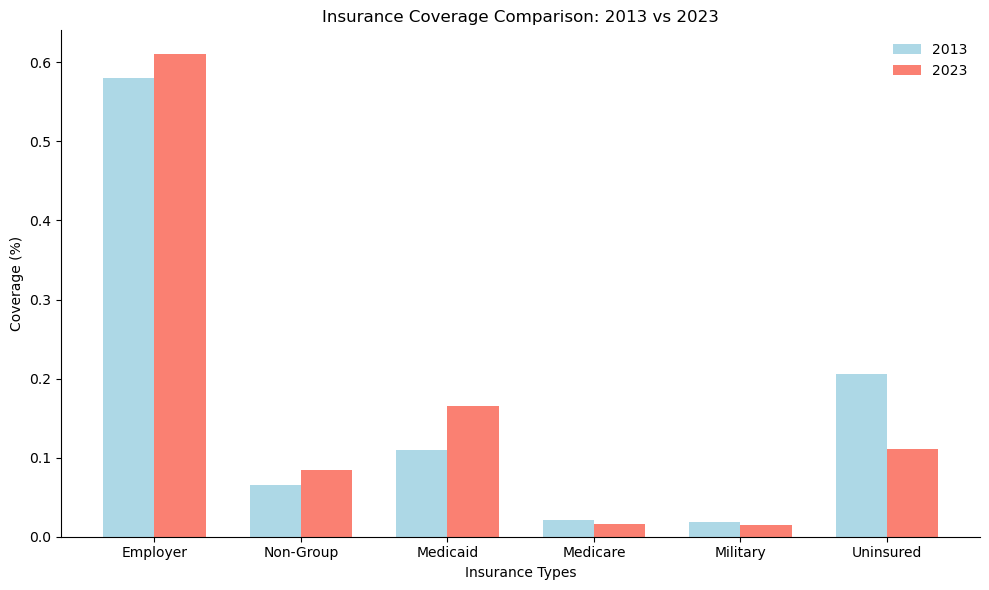

In [23]:
us_data_2013 = data_2013.loc['United States']
us_data_2023 = data_2023.loc['United States']

insurance_types = us_data_2013.index  
coverage_2013 = us_data_2013.values  
coverage_2023 = us_data_2023.values  

bar_width = 0.35  
index = np.arange(len(insurance_types))  

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(index, coverage_2013, bar_width, label='2013', color='lightblue')
bar2 = ax.bar(index + bar_width, coverage_2023, bar_width, label='2023', color='salmon')

ax.set_xlabel('Insurance Types')
ax.set_ylabel('Coverage (%)')
ax.set_title('Insurance Coverage Comparison: 2013 vs 2023')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(insurance_types,ha='center')
ax.legend(frameon= False)

sns.despine(ax=ax)
plt.tight_layout()
plt.show()


### Original insurance type map

In [25]:
# Load shapefile
shapefile_path = "cb_2018_us_state_5m/cb_2018_us_state_5m.shp"
# Create GeoDataFrame for 2013
world = geopandas.read_file(shapefile_path)

In [26]:
# Create GeoDataFrame for 2013
data_2013_reset = data_2013.reset_index()  
data_merged_2013 = world.set_index('NAME').join(data_2013_reset.set_index('Location'), how='left')

geo_df_2013 = geopandas.GeoDataFrame(data_merged_2013, geometry='geometry', crs="EPSG:4326")
geo_df_2013 = geo_df_2013.reset_index()

In [27]:
# Create GeoDataFrame for 2023
data_2023_reset = data_2023.reset_index()  
data_merged_2023 = world.set_index('NAME').join(data_2023_reset.set_index('Location'), how='left')

geo_df_2023 = geopandas.GeoDataFrame(data_merged_2023, geometry='geometry',crs="EPSG:4326")
geo_df_2023 = geo_df_2023.reset_index()

In [28]:
shapefile_states = world['NAME'].unique()
data_states_2013 = data_2013.index.unique()
data_states_2023 = data_2023.index.unique()

missing_from_data_2013 = [state for state in shapefile_states if state not in data_states_2013]
missing_from_data_2023 = [state for state in shapefile_states if state not in data_states_2023]

print("States in shapefile but missing from 2013 data:", missing_from_data_2013)
print("States in shapefile but missing from 2023 data:", missing_from_data_2023)

States in shapefile but missing from 2013 data: ['United States Virgin Islands', 'Guam', 'Commonwealth of the Northern Mariana Islands', 'American Samoa']
States in shapefile but missing from 2023 data: ['United States Virgin Islands', 'Guam', 'Commonwealth of the Northern Mariana Islands', 'American Samoa']


In [29]:
geo_df_2013['NAME'] = geo_df_2013['NAME'].str.strip().str.title()

In [30]:
print(geo_df_2013['NAME'].unique())

['Nebraska' 'Washington' 'New Mexico' 'South Dakota' 'Texas' 'California'
 'Kentucky' 'Ohio' 'Alabama' 'Georgia' 'Wisconsin' 'Oregon' 'Pennsylvania'
 'Mississippi' 'Missouri' 'North Carolina' 'Oklahoma' 'West Virginia'
 'New York' 'Indiana' 'Kansas' 'Idaho' 'Nevada' 'Vermont' 'Montana'
 'Minnesota' 'North Dakota' 'Hawaii' 'Arizona' 'Delaware' 'Rhode Island'
 'Colorado' 'Utah' 'Virginia' 'Wyoming' 'Louisiana' 'Michigan'
 'Massachusetts' 'Florida' 'United States Virgin Islands' 'Connecticut'
 'New Jersey' 'Maryland' 'South Carolina' 'Maine' 'New Hampshire'
 'District Of Columbia' 'Guam'
 'Commonwealth Of The Northern Mariana Islands' 'American Samoa' 'Iowa'
 'Puerto Rico' 'Arkansas' 'Tennessee' 'Illinois' 'Alaska']


In [31]:
alaska_data_2013 = geo_df_2013[geo_df_2013['NAME'] == 'Alaska']
hawaii_data_2013 = geo_df_2013[geo_df_2013['NAME'] == 'Hawaii']

usa_mainland_2013 = geo_df_2013[~geo_df_2013['NAME'].isin(['Alaska', 'Hawaii'])]

In [32]:
alaska_data_2023 = geo_df_2023[geo_df_2013['NAME'] == 'Alaska']
hawaii_data_2023 = geo_df_2023[geo_df_2013['NAME'] == 'Hawaii']

usa_mainland_2023 = geo_df_2023[~geo_df_2013['NAME'].isin(['Alaska', 'Hawaii'])]

### Set the both 2013 and 2023 Medicaid color to orange, clear to say the coverage has increased after ACA by the color index, circle the 10 states who is ont participating in the medicaid program (in the paper)

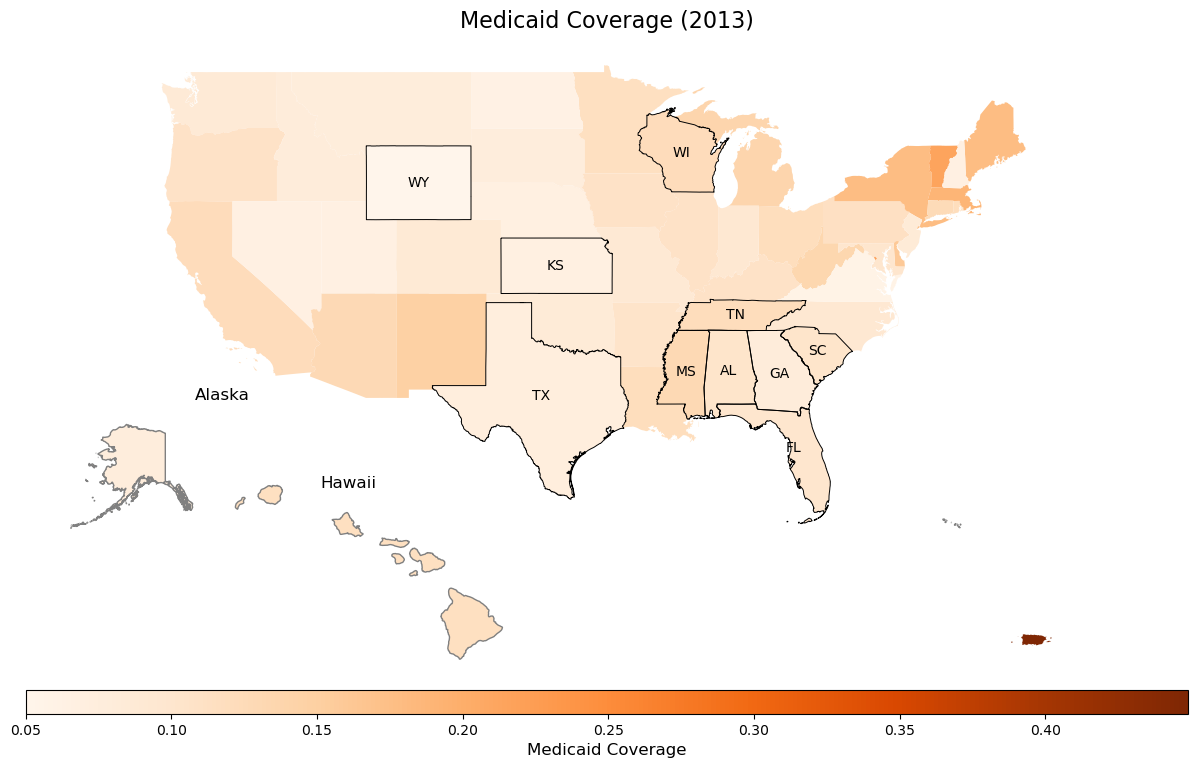

In [34]:
# Medicaid 2013 with state border

non_expanded_states = [
    "Alabama", "Florida", "Georgia", "Kansas", "Mississippi", 
    "South Carolina", "Tennessee", "Texas", "Wisconsin", "Wyoming"
]

state_abbreviations = {
    "Alabama": "AL", "Florida": "FL", "Georgia": "GA", "Kansas": "KS", "Mississippi": "MS",
    "South Carolina": "SC", "Tennessee": "TN", "Texas": "TX", "Wisconsin": "WI", "Wyoming": "WY"
}

non_expanded_gdf = geo_df_2013[geo_df_2013['NAME'].isin(non_expanded_states)]

fig, main_ax = plt.subplots(figsize=(15, 10))
norm = plt.Normalize(vmin=geo_df_2013['Medicaid'].min(), vmax=geo_df_2013['Medicaid'].max())

usa_mainland_2013.plot(
    column='Medicaid',
    cmap='Oranges',
    ax=main_ax,
    edgecolor=None
)

non_expanded_gdf.plot(
    ax=main_ax,
    facecolor='none',  
    edgecolor='black', 
    linewidth=0.7
)

for _, row in non_expanded_gdf.iterrows():
    main_ax.annotate(
        text=state_abbreviations[row['NAME']],  
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),  
        ha='center', va='center',
        fontsize=10, color='black', weight=0.5
    )

main_ax.set_title("Medicaid Coverage (2013)", fontsize=16)
main_ax.axis('off')

# Alaska inset
alaska_ax = inset_axes(
    main_ax,
    width="100%", height="100%", 
    loc='lower left',
    bbox_to_anchor=(-0.1, -0.2, 1, 1),  
    bbox_transform=main_ax.transAxes,
    axes_class=plt.Axes
)
alaska_data_2013.plot(
    column='Medicaid',
    cmap='Oranges',
    ax=alaska_ax,
    edgecolor='grey',
    norm=norm
)
alaska_ax.set_title("Alaska", fontsize=12, x=0.2, y=1.1)
alaska_ax.axis('off')

# Hawaii inset
hawaii_ax = inset_axes(
    main_ax,
    width="30%", height="30%",  
    loc='lower left',
    bbox_to_anchor=(0.1, 0, 1, 1),  
    bbox_transform=main_ax.transAxes,
    axes_class=plt.Axes
)
hawaii_data_2013.plot(
    column='Medicaid',
    cmap='Oranges',
    ax=hawaii_ax,
    edgecolor='grey',
    norm=norm
)
hawaii_ax.set_title("Hawaii", fontsize=12, x=0.43, y=0.9)
hawaii_ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=geo_df_2013['Medicaid'].min(), vmax=geo_df_2013['Medicaid'].max()))
cbar = fig.colorbar(sm, ax=main_ax, orientation='horizontal', pad=0.02, aspect=50)
cbar.set_label("Medicaid Coverage", fontsize=12)

plt.show()


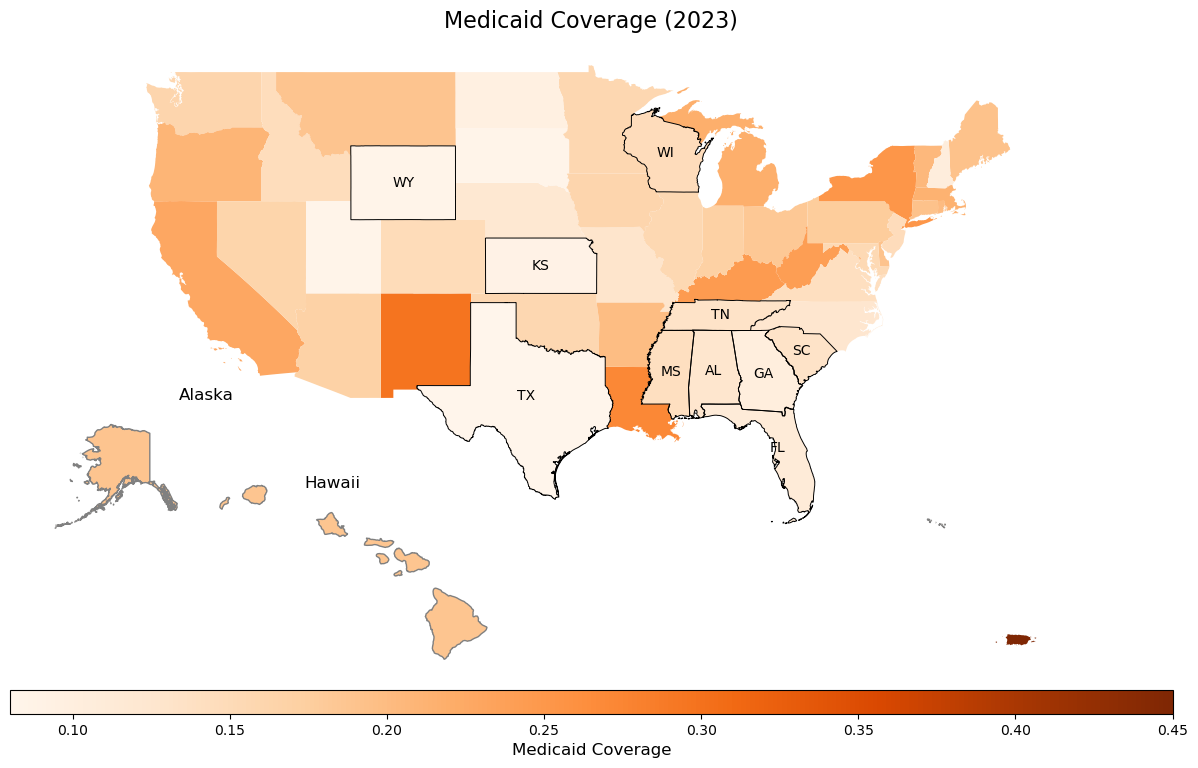

In [35]:
# Medicaid 2023 with state border
fig, main_ax = plt.subplots(figsize=(15, 10))
norm = plt.Normalize(vmin=geo_df_2023['Medicaid'].min(), vmax=geo_df_2023['Medicaid'].max())

usa_mainland_2023.plot(
    column='Medicaid',
    cmap='Oranges',
    ax=main_ax,
    edgecolor=None
)

non_expanded_gdf.plot(
    ax=main_ax,
    facecolor='none',  
    edgecolor='black', 
    linewidth=0.7
)

for _, row in non_expanded_gdf.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    main_ax.annotate(
        text=state_abbreviations[row['NAME']],  
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),  
        ha='center', va='center',
        fontsize=10, color='black', weight=0.5
    )

main_ax.set_title("Medicaid Coverage (2023)", fontsize=16)
main_ax.axis('off')

# Alaska inset
alaska_ax = inset_axes(
    main_ax,
    width="100%", height="100%", 
    loc='lower left',
    bbox_to_anchor=(-0.1, -0.2, 1, 1),  
    bbox_transform=main_ax.transAxes,
    axes_class=plt.Axes
)
alaska_data_2023.plot(
    column='Medicaid',
    cmap='Oranges',
    ax=alaska_ax,
    edgecolor='grey',
    norm=norm
)
alaska_ax.set_title("Alaska", fontsize=12, x=0.2, y=1.1)
alaska_ax.axis('off')

# Hawaii inset
hawaii_ax = inset_axes(
    main_ax,
    width="30%", height="30%",  
    loc='lower left',
    bbox_to_anchor=(0.1, 0, 1, 1),  
    bbox_transform=main_ax.transAxes,
    axes_class=plt.Axes
)
hawaii_data_2023.plot(
    column='Medicaid',
    cmap='Oranges',
    ax=hawaii_ax,
    edgecolor='grey',
    norm=norm
)
hawaii_ax.set_title("Hawaii", fontsize=12, x=0.43, y=0.9)
hawaii_ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=geo_df_2023['Medicaid'].min(), vmax=geo_df_2023['Medicaid'].max()))
cbar = fig.colorbar(sm, ax=main_ax, orientation='horizontal', pad=0.02, aspect=50)
cbar.set_label("Medicaid Coverage", fontsize=12)

plt.show()


### ACA addtional plot analysis, medicaid coverage goes up, and help lower down the uninsued

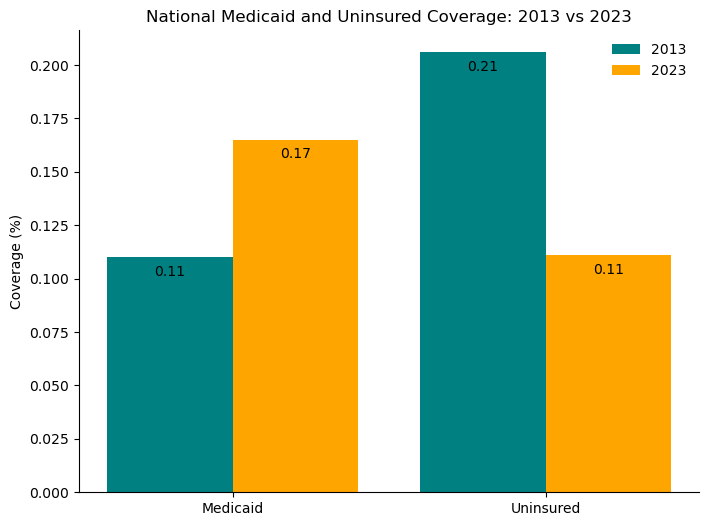

In [37]:
national_2013 = data_2013.iloc[0]
national_2023 = data_2023.iloc[0]

categories = ['Medicaid', 'Uninsured']
values_2013 = national_2013[categories].values
values_2023 = national_2023[categories].values

x = np.arange(len(categories))  
bar_width = 0.4  

fig, ax = plt.subplots(figsize=(8, 6))

bar1 = ax.bar(x - bar_width / 2, values_2013, bar_width, label='2013', color='teal')
bar2 = ax.bar(x + bar_width / 2, values_2023, bar_width, label='2023', color='orange')

ax.set_ylabel('Coverage (%)')
ax.set_title('National Medicaid and Uninsured Coverage: 2013 vs 2023')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(frameon = False)

for bars in [bar1, bar2]:
    for bar in bars:
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            bar.get_height() - 0.01, 
            f'{bar.get_height():.2f}', 
            ha='center', 
            va='bottom', 
            fontsize=10
        )
    
sns.despine(ax=ax)
plt.show()
